# Front-Runner-Detector

_To learn how to use this template, check out the course ["Data Structures and Algorithms in Python"](https://jovian.ai/learn/data-structures-and-algorithms-in-python)._




## How to run the code and save your work

The recommended way to run this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. 

This tutorial is an executable [Jupyter notebook](https://jupyter.org). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

#### Saving your work

Before staring the assignment, let's save a snapshot of the assignment to your [Jovian](https://jovian.ai) profile, so that you can access it later, and continue your work.

In [195]:
project_name = 'AK_Front_Runner_Detector' # give it an appropriate name

In [196]:
%pip install jovian --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [197]:
import jovian

In [198]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## Problem Statement


> 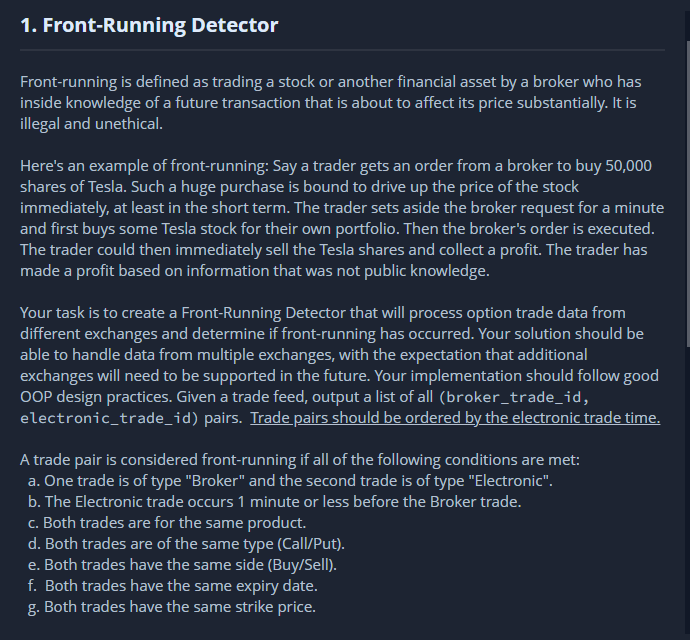
> 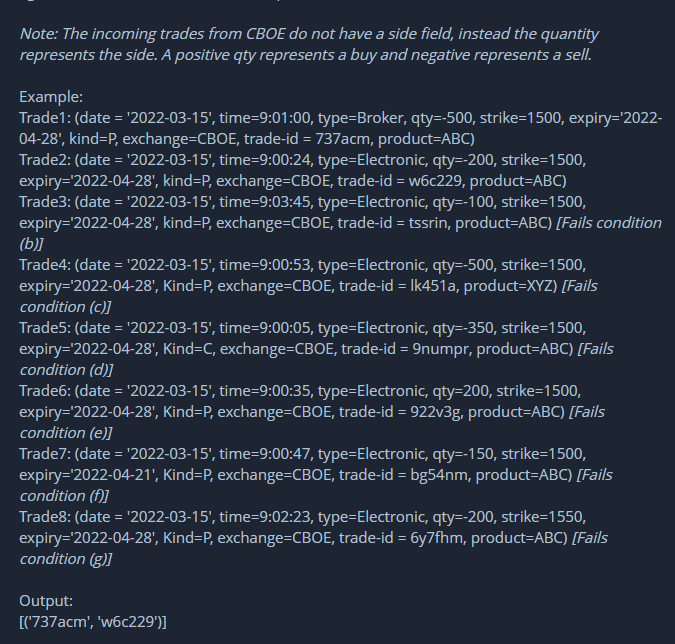


Source: AK OA

## The Method

Here's the systematic strategy we'll apply for solving problems:

1. State the problem clearly. Identify the input & output formats.
2. Come up with some example inputs & outputs. Try to cover all edge cases.
3. Come up with a correct solution for the problem. State it in plain English.
4. Implement the solution and test it using example inputs. Fix bugs, if any.
5. Analyze the algorithm's complexity and identify inefficiencies, if any.
6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

This approach is explained in detail in [Lesson 1](https://jovian.ai/learn/data-structures-and-algorithms-in-python/lesson/lesson-1-binary-search-linked-lists-and-complexity) of the course. Let's apply this approach step-by-step.

## Solution


### 1. State the problem clearly. Identify the input & output formats.

While this problem is stated clearly enough, it's always useful to try and express in your own words, in a way that makes it most clear for you. 


**Problem**

> We want to create a program that takes in a set of data containing trades and detects a specific condition called front running. We want to create this program using an OOP design pattern. For the condition to be met:
>
    1. One trade is of type broker and other is electronic.
    2. Time of Electronic - Time of Broker trade is <= 1min 
    3. Trades have same product.
    4. Trades are of same type.
    5. Trades have same side (buy/sell, i.e when both have same sign for qty).
    6. Trades have same expiry date.
    7. Trades have same strike price.
  

<br/>


**Input**

1. A list of trades (trade feed) containing more than one objects of the type 'Trade'. 

(add more if required)


**Output**

1. A list of all pairs in the form of tuples (broker_trade_id, electronic_trade_id) of trades, ordered by electronic trade time.  


<br/>

Based on the above, we can now create a signature of our function:

In [199]:
class FrontRunner:
    def __init__(self, trades):
        self.trades = trades
    
    # return all unique pairs of trades
    def all_pairs(self):
        """takes a trade feed and returns all unique pairs"""
        pass
    
    # given two trades, compare them to see if they meet FR conditions
    def detect_FR(self, trade1, trade2):
        """takes two unique trades, returns their ids if FR, else returns none"""
        pass
    
    # print the trade feed
    def __repr__(self):
        pass

Save and upload your work before continuing.

### 2. Come up with some example inputs & outputs. Try to cover all edge cases.

Our function should be able to handle any set of valid inputs we pass into it. Here's a list of some possible variations we might encounter:

1. A trade feed with 1 pair of FR.
2. A trade feed with no pairs of FR.
3. A trade feed with where each trade is in a pair of FR.
4. A trade feed with only 2 trades, that are FR.
5. A trade feed with only 1 trade, returning an empty list.
6. An empty trade feed, returning an empty list.


We'll express our test cases as dictionaries, to test them easily. Each dictionary will contain 2 keys: `input` (a dictionary itself containing one key for each argument to the function and `output` (the expected result from the function). 

In [200]:
import datetime as DT
import time

In [201]:
trade1 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 1, 0),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade1['trDate'].strftime("%Y-%m-%d"),
#     'time': trade1['trDate'].strftime("%H:%M:%S"),
    'type': 'Broker',
    'qty' : -500,
    'strike': 1500,
#     'expiry': trade1['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': '737acm',
    'product': 'ABC'
}

In [202]:
trade1

{'trDate': datetime.datetime(2022, 3, 15, 9, 1),
 'expDate': datetime.datetime(2022, 4, 28, 0, 0),
 'type': 'Broker',
 'qty': -500,
 'strike': 1500,
 'kind': 'P',
 'exchange': 'CBOE',
 'tradeId': '737acm',
 'product': 'ABC'}

In [203]:
trade2 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 0, 24),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade2['trDate'].strftime("%Y-%m-%d"),
#     'time': trade2['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : -200,
    'strike': 1500,
#     'expiry': trade2['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': 'w6c229',
    'product': 'ABC'
}

In [204]:
trade3 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 3, 45),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade3['trDate'].strftime("%Y-%m-%d"),
#     'time': trade3['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : -100,
    'strike': 1500,
#     'expiry': trade3['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': 'tssrin',
    'product': 'ABC'
}

In [205]:
trade4 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 3, 53),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade4['trDate'].strftime("%Y-%m-%d"),
#     'time': trade4['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : -500,
    'strike': 1500,
#     'expiry': trade4['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': 'lk451a',
    'product': 'XYZ'
}

In [206]:
trade5 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 0, 5),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade5['trDate'].strftime("%Y-%m-%d"),
#     'time': trade5['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : -350,
    'strike': 1500,
#     'expiry': trade5['expDate'].strftime("%Y-%m-%d"),
    'kind': 'C',
    'exchange': 'CBOE',
    'tradeId': '9numpr',
    'product': 'ABC'
}

In [207]:
trade6 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 0, 35),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade6['trDate'].strftime("%Y-%m-%d"),
#     'time': trade6['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : 200,
    'strike': 1500,
#     'expiry': trade6['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': '922v3g',
    'product': 'ABC'
}

In [208]:
trade7 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 0, 47),
    'expDate': DT.datetime(2022, 4, 21),
#     'date': trade7['trDate'].strftime("%Y-%m-%d"),
#     'time': trade7['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : -150,
    'strike': 1500,
#     'expiry': trade7['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': 'bg54nm',
    'product': 'ABC'
}

In [209]:
trade8 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 2, 23),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade8['trDate'].strftime("%Y-%m-%d"),
#     'time': trade8['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : -200,
    'strike': 1550,
#     'expiry': trade8['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': '6y7fhm',
    'product': 'ABC'
}

In [210]:
# write function to change the time of trade to date and string
def date_to_str (trades):
    for trade in trades:
        trade['date'] = trade['trDate'].strftime("%Y-%m-%d")
        trade['time'] = trade['trDate'].strftime("%H:%M:%S")
        # print('date: ', date, ' time: ', time)


In [211]:
trades0 = [trade1, trade2, trade3, trade4, trade5, trade6, trade7, trade8]
date_to_str(trades0)
# trades0

In [212]:
test0 = {
    'input': {
        'trade': trades0
    },
    'output': [(trade1['tradeId'], trade2['tradeId'])]
}
test0

{'input': {'trade': [{'trDate': datetime.datetime(2022, 3, 15, 9, 1),
    'expDate': datetime.datetime(2022, 4, 28, 0, 0),
    'type': 'Broker',
    'qty': -500,
    'strike': 1500,
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': '737acm',
    'product': 'ABC',
    'date': '2022-03-15',
    'time': '09:01:00'},
   {'trDate': datetime.datetime(2022, 3, 15, 9, 0, 24),
    'expDate': datetime.datetime(2022, 4, 28, 0, 0),
    'type': 'Electronic',
    'qty': -200,
    'strike': 1500,
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': 'w6c229',
    'product': 'ABC',
    'date': '2022-03-15',
    'time': '09:00:24'},
   {'trDate': datetime.datetime(2022, 3, 15, 9, 3, 45),
    'expDate': datetime.datetime(2022, 4, 28, 0, 0),
    'type': 'Electronic',
    'qty': -100,
    'strike': 1500,
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': 'tssrin',
    'product': 'ABC',
    'date': '2022-03-15',
    'time': '09:03:45'},
   {'trDate': datetime.datetime(2022, 3, 15, 9, 3, 53),
 

Create one test case for each of the scenarios listed above. We'll store our test cases in an array called `tests`.

In [213]:
# modify trade2 to make it not a FR
trade21 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 0, 24),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade20['trDate'].strftime("%Y-%m-%d"),
#     'time': trade20['trDate'].strftime("%H:%M:%S"),
    'type': 'Broker',
    'qty' : -200,
    'strike': 1500,
#     'expiry': trade2['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': 'w6c229',
    'product': 'ABC'
}

In [245]:
trades1 = [trade1, trade21, trade3, trade4, trade5, trade6, trade7, trade8]

In [247]:
date_to_str(trades1)
# trades1

In [216]:
test1 = {
    'input': {
        'trade': trades1
    },
    'output': []
}
# test1

In [217]:
trades2 = []
trades2.append(trade1)
trades2.append(trade2)

In [218]:
# modify trade3 - trade8 to make them all match a FR with trade1

# trade3 - change the time to with 1 min of trade1
trade32 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 0, 59),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade32['trDate'].strftime("%Y-%m-%d"),
#     'time': trade32['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : -100,
    'strike': 1500,
#     'expiry': trade32['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': 'tssrin',
    'product': 'ABC'
}
trades2.append(trade32)

In [219]:
# trade4 - change the product to be same as trade1
trade42 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 0, 58),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade42['trDate'].strftime("%Y-%m-%d"),
#     'time': trade42['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : -500,
    'strike': 1500,
#     'expiry': trade42['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': 'lk451a',
    'product': 'ABC'
}
trades2.append(trade42)

In [220]:
# trade5 - change to same type as trade1
trade52 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 0, 57),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade52['trDate'].strftime("%Y-%m-%d"),
#     'time': trade52['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : -350,
    'strike': 1500,
#     'expiry': trade52['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': '9numpr',
    'product': 'ABC'
}
trades2.append(trade52)

In [221]:
# trade6 - change to same side as trade1
trade62 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 0, 56),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade62['trDate'].strftime("%Y-%m-%d"),
#     'time': trade62['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : -200,
    'strike': 1500,
#     'expiry': trade62['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': '922v3g',
    'product': 'ABC'
}
trades2.append(trade62)

In [222]:
# trade7 - change expiry date to same as trade1
trade72 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 0, 47),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade72['trDate'].strftime("%Y-%m-%d"),
#     'time': trade72['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : -150,
    'strike': 1500,
#     'expiry': trade72['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': 'bg54nm',
    'product': 'ABC'
}
trades2.append(trade72)

In [223]:
# trade8 - change strike price to same as trade1
trade82 = {
    'trDate': DT.datetime(2022, 3, 15, 9, 0, 45),
    'expDate': DT.datetime(2022, 4, 28),
#     'date': trade82['trDate'].strftime("%Y-%m-%d"),
#     'time': trade82['trDate'].strftime("%H:%M:%S"),
    'type': 'Electronic',
    'qty' : -200,
    'strike': 1500,
#     'expiry': trade82['expDate'].strftime("%Y-%m-%d"),
    'kind': 'P',
    'exchange': 'CBOE',
    'tradeId': '6y7fhm',
    'product': 'ABC'
}
trades2.append(trade82)

In [224]:
test2 = {
    'input': {
        'trade': trades2
    },
    'output': [(trade1['tradeId'], trade2['tradeId']),
               (trade1['tradeId'], trade82['tradeId']),
               (trade1['tradeId'], trade72['tradeId']),
               (trade1['tradeId'], trade62['tradeId']),
               (trade1['tradeId'], trade52['tradeId']),
               (trade1['tradeId'], trade42['tradeId']),
               (trade1['tradeId'], trade32['tradeId'])]
}

date_to_str(trades2)
trades2

[{'trDate': datetime.datetime(2022, 3, 15, 9, 1),
  'expDate': datetime.datetime(2022, 4, 28, 0, 0),
  'type': 'Broker',
  'qty': -500,
  'strike': 1500,
  'kind': 'P',
  'exchange': 'CBOE',
  'tradeId': '737acm',
  'product': 'ABC',
  'date': '2022-03-15',
  'time': '09:01:00'},
 {'trDate': datetime.datetime(2022, 3, 15, 9, 0, 24),
  'expDate': datetime.datetime(2022, 4, 28, 0, 0),
  'type': 'Electronic',
  'qty': -200,
  'strike': 1500,
  'kind': 'P',
  'exchange': 'CBOE',
  'tradeId': 'w6c229',
  'product': 'ABC',
  'date': '2022-03-15',
  'time': '09:00:24'},
 {'trDate': datetime.datetime(2022, 3, 15, 9, 0, 59),
  'expDate': datetime.datetime(2022, 4, 28, 0, 0),
  'type': 'Electronic',
  'qty': -100,
  'strike': 1500,
  'kind': 'P',
  'exchange': 'CBOE',
  'tradeId': 'tssrin',
  'product': 'ABC',
  'date': '2022-03-15',
  'time': '09:00:59'},
 {'trDate': datetime.datetime(2022, 3, 15, 9, 0, 58),
  'expDate': datetime.datetime(2022, 4, 28, 0, 0),
  'type': 'Electronic',
  'qty': -50

In [225]:
# add more test cases

convert string to datetime obj:
https://stackoverflow.com/questions/3096953/how-to-calculate-the-time-interval-between-two-time-strings

### 3. Come up with a correct solution for the problem. State it in plain English.

Our first goal should always be to come up with a _correct_ solution to the problem, which may not necessarily be the most _efficient_ solution. Come with a correct solution and explain it in simple words below:

0. Find all pairs of 2 trades. 
1. For each pair, check all conditions a to g.
2. Since all conditions must be met, return none if one is not met.
3. If all a-g are met, return the two trade id's.
4. sort the trade id's by electronic trade time.

(add more steps if required)

###  4. Implement the solution and test it using example inputs. Fix bugs, if any.

In [249]:
from datetime import datetime, date
from itertools import combinations

class FrontRunner:
    def __init__(self, trades):
        self.trades = trades
    
    def all_combs(self):
        """takes a trade feed and returns all unique pairs"""
        return [comb for comb in combinations(self.trades, 2)]            
    
    def detect_FR(self, trade1, trade2):
        """takes two unique trades, returns the trades if FR 
        in order of broker trade, electronic trade
        if not FR, return"""        
        # condition a
        if trade1['type'] == trade2['type']: return 
        # determine which is broker, which is electronic
        if trade1['type'] == 'Broker':
            broker, elec = trade1, trade2
        else:
            elec, broker = trade1, trade2
        # condition b
        # update to use the string date and time
        if elec['date'] != broker['date']: return # must be on the same date
        if self.time_diff(elec['time'], broker['time']) > 0: return # elec trade must occur before broker
        if self.time_diff(broker['time'], elec['time']) > 60: return # broker trade is not within 1 min of elec trade
        # condition c
        if broker['product'] != elec['product']: return
        # condition d
        if broker['kind'] != elec['kind']: return
        # condition e
        if broker['qty'] * elec['qty'] < 0: return
        # condition f
        if broker['expDate'] != elec['expDate']: return 
        # condition g
        if broker['strike'] != elec['strike']: return 
        
        return broker, elec
    
    def time_diff(self, broker_time, elec_time):
        """takes 2 times in string format %H:$M:%S and returns difference in seconds"""
        broker_dt = datetime.strptime(broker_time, '%H:%M:%S').time()
        elec_dt = datetime.strptime(elec_time, '%H:%M:%S').time()
        return (datetime.combine(date.today(), broker_dt) - 
        datetime.combine(date.today(), elec_dt)).total_seconds() 

    def find_FR(self):
        """return list of pair of trade that are identified as FRs
        sorted in ORDER OF ELECTRONIC TRADE TIME"""
        front_runners = []
        for tr1, tr2 in self.all_combs():
            if self.detect_FR(tr1, tr2):
                front_runners.append(self.detect_FR(tr1, tr2))
        return sorted(front_runners, key=lambda x: x[1]['trDate'])
    
    def front_runner_ids(self):
        """return just the trade Ids"""
        return [(broker['tradeId'], elec['tradeId']) for broker, elec in self.find_FR()]

    ##*************************************************************************##

    def print_combsIds(self):
        """print all unique combinations"""
        for combs in self.all_combs():
            print('('+', '.join(trade['tradeId'] for trade in combs)+')')    

    def format_trade(self, trade):
        """return trade as formatted string"""
        return '('+', '.join('='.join((key,str(val))) for (key,val) in trade.items())+')'
    
    def __repr__(self):
        """represent trades feed as formatted string"""
        return '\n'.join([':'.join(('Trade'+(str(i)), self.format_trade(trade))) for i, trade in enumerate(self.trades, 1)])
    
    def __str__(self):
        return self.__repr__()

In [250]:
fr0 = FrontRunner(trades0)
# fr0
fr0.time_diff('9:01:00', '9:00:24')


36.0

In [251]:
fr0.front_runner_ids()

[('737acm', 'w6c229')]

In [253]:
test0['output'] == fr0.front_runner_ids()

True

In [254]:
fr1 = FrontRunner(trades1)
# fr1

In [255]:
test1['output'] == fr1.front_runner_ids()

True

In [256]:
fr2 = FrontRunner(trades2)
fr2

Trade1:(trDate=2022-03-15 09:01:00, expDate=2022-04-28 00:00:00, type=Broker, qty=-500, strike=1500, kind=P, exchange=CBOE, tradeId=737acm, product=ABC, date=2022-03-15, time=09:01:00)
Trade2:(trDate=2022-03-15 09:00:24, expDate=2022-04-28 00:00:00, type=Electronic, qty=-200, strike=1500, kind=P, exchange=CBOE, tradeId=w6c229, product=ABC, date=2022-03-15, time=09:00:24)
Trade3:(trDate=2022-03-15 09:00:59, expDate=2022-04-28 00:00:00, type=Electronic, qty=-100, strike=1500, kind=P, exchange=CBOE, tradeId=tssrin, product=ABC, date=2022-03-15, time=09:00:59)
Trade4:(trDate=2022-03-15 09:00:58, expDate=2022-04-28 00:00:00, type=Electronic, qty=-500, strike=1500, kind=P, exchange=CBOE, tradeId=lk451a, product=ABC, date=2022-03-15, time=09:00:58)
Trade5:(trDate=2022-03-15 09:00:57, expDate=2022-04-28 00:00:00, type=Electronic, qty=-350, strike=1500, kind=P, exchange=CBOE, tradeId=9numpr, product=ABC, date=2022-03-15, time=09:00:57)
Trade6:(trDate=2022-03-15 09:00:56, expDate=2022-04-28 00:0

In [257]:
fr2.front_runner_ids()

[('737acm', 'w6c229'),
 ('737acm', '6y7fhm'),
 ('737acm', 'bg54nm'),
 ('737acm', '922v3g'),
 ('737acm', '9numpr'),
 ('737acm', 'lk451a'),
 ('737acm', 'tssrin')]

In [258]:
test2['output']

[('737acm', 'w6c229'),
 ('737acm', '6y7fhm'),
 ('737acm', 'bg54nm'),
 ('737acm', '922v3g'),
 ('737acm', '9numpr'),
 ('737acm', 'lk451a'),
 ('737acm', 'tssrin')]

In [259]:
test2['output'] == fr2.front_runner_ids()

True

In [260]:
FrontRunner([]).find_FR() == []

True

In [261]:
FrontRunner([trade1]).find_FR() == []

True

In [262]:
import unittest

class TestFrontRunner(unittest.TestCase):
    
    def test0(self):
        fr0 = FrontRunner(test0['input']['trade'])
        self.assertEqual(test0['output'], fr0.front_runner_ids())
    
    def test1(self):
        fr1 = FrontRunner(test1['input']['trade'])
        self.assertEqual(test1['output'], fr1.front_runner_ids())
    
    def test2(self):
        fr2 = FrontRunner(test2['input']['trade'])
        self.assertEqual(test2['output'], fr2.front_runner_ids())
    
    # trade feed w/ 1 trade
    def test3(self):
        fr3 = FrontRunner([trade1])
        self.assertEqual([], fr3.front_runner_ids())
    
    # trade feed w/ no trades
    def test4(self):
        fr4 = FrontRunner([])
        self.assertEqual([], fr4.front_runner_ids())


unittest.main(argv=[''], verbosity=2, exit=False)


test0 (__main__.TestFrontRunner) ... ok
test1 (__main__.TestFrontRunner) ... ok
test2 (__main__.TestFrontRunner) ... ok
test3 (__main__.TestFrontRunner) ... ok
test4 (__main__.TestFrontRunner) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK


In [239]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


### 5. Analyze the algorithm's complexity and identify inefficiencies, if any.

In [240]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


### 6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

In [241]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


### 7. Come up with a correct solution for the problem. State it in plain English.

Come with the optimized correct solution and explain it in simple words below:

1. **???**
2. **???**
3. **???**
4. **???**
5. **???**

(add more steps if required)


Let's save and upload our work before continuing.



In [242]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


### 8. Implement the solution and test it using example inputs. Fix bugs, if any.

### 9. Analyze the algorithm's complexity and identify inefficiencies, if any.

If you found the problem on an external platform, you can make a submission to test your solution.

Share your approach and start a discussion on the Jovian forum: https://jovian.ai/forum/c/data-structures-and-algorithms-in-python/78

In [243]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"
